<a href="https://colab.research.google.com/gist/Frostnova404/9ed80b1a8adf22a26366e9832279c4de/proyek-analisis-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike-sharing]
- **Nama:** [Andi Muhammad Naufal]
- **Email:** [amnaufal04@gmail.com]
- **ID Dicoding:** [andi_naufal]

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sepeda berdasarkan musim dan hari kerja?
- Faktor apa yang paling memengaruhi jumlah penggunaan sepeda per jam?
- Apa Hubungan suhu pada jumlah penggunaan sepeda

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Frostnova404/Proyek-Analisis-Data/dae70b89ccc4d88ad947ed13c620406cacaf6294/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Frostnova404/Proyek-Analisis-Data/dae70b89ccc4d88ad947ed13c620406cacaf6294/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Di tahap gathering data, dilakukan pembacaan dan dataset, disini ada 2 dataset, yaitu hour.csv dan day.csv

### Assessing Data

In [ ]:
def check_df(df, name):
    print(f"\n--- {name} ---")
    print(f"Meriksa data yang hilang:\n{df.isnull().sum()}")
    print(f"Data yang sama: {df.duplicated().sum()}")

Memeriksa Data `day_df`


In [ ]:
print('Informasi Data Harian:\n')
day_df.info()

Informasi Data Harian:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Cek data hilang/kosong
check_df(day_df, "Data Harian")


--- Data Harian ---
Meriksa data yang hilang:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Data yang sama: 0


Memeriksa data `hour_df`

In [ ]:
print('Informasi Data Per-jam:\n')
hour_df.info()

Informasi Data Per-jam:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Cek data hilang/kosong
check_df(hour_df, "Data Per Jam")


--- Data Per Jam ---
Meriksa data yang hilang:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Data yang sama: 0


- Dapat dilihat di tahap ini adalah memeriksa dataset yang telah diambil pada tahap gathering data, dilakukan pengecekan untuk info data per class, kemudian dilakukan pemeriksaan untuk melihat apakah ada data kosong

- Pada hasil `check_df` untuk masing-masing dataset, tidak terdapat data kosong

### Cleaning Data

In [ ]:
# --- Cleaning Data --- #
def clean_data(df, name):
    print(f"\n--- Cleaning {name} ---")
    if df.isnull().sum().sum() == 0:
        print("Tidak ada nilai kosong dalam dataset.")
    else:
        print("Nilai kosong ditemukan, melakukan pengisian atau penghapusan.")
        df.dropna(inplace=True)

    if df.duplicated().sum() == 0:
        print("Tidak ada data duplikat dalam dataset.")
    else:
        print("Data duplikat ditemukan, melakukan penghapusan.")
        df.drop_duplicates(inplace=True)

    print(f"{name} cleaned successfully!\n")

#Cetak report day_df dan hour_df
clean_data(day_df, "Data Harian")
clean_data(hour_df, "Data Per Jam")


--- Cleaning Data Harian ---
Tidak ada nilai kosong dalam dataset.
Tidak ada data duplikat dalam dataset.
Data Harian cleaned successfully!


--- Cleaning Data Per Jam ---
Tidak ada nilai kosong dalam dataset.
Tidak ada data duplikat dalam dataset.
Data Per Jam cleaned successfully!



- Tidak terdapat adanya data kosong ataupun duplikat seperti yang sudah di cek pada tahap "Assessing data", jadi tahap cleaning data tidak terlalu penting disini namun di buat saja menggunakan if else untuk jaga-jaga

## Exploratory Data Analysis (EDA)

### Explore data `day_df`

In [ ]:
def explore_day_data():
    print("\n--- Explore day_df ---")

In [ ]:
# Menampilkan 5 sampel data acak dari dataset
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
157,158,2011-06-07,2,0,6,0,2,1,1,0.707500,0.655950,0.597917,0.187808,763,4070,4833
113,114,2011-04-24,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191
164,165,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891
313,314,2011-11-10,4,0,11,0,4,1,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933
50,51,2011-02-20,1,0,2,0,0,0,1,0.285217,0.277330,0.407826,0.223235,639,1173,1812


In [ ]:
# Menghitung statistik deskriptif untuk semua kolom dalam dataset
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
# Cek kalau kolom 'instant' unik di dataset ini
print(f"Is 'instant' unique? {day_df['instant'].is_unique}")
print(f"Duplicated 'instant': {day_df['instant'].duplicated().sum()}")

Is 'instant' unique? True
Duplicated 'instant': 0


In [ ]:
# kelompokkan data dengan kolom 'season', kmudian hitung agregasi dari cnt dan temp
day_df.groupby(by="season").agg({
        "cnt": ["max", "min", "mean", "std"],
        "temp": ["mean", "std"],
    })

cnt                                      temp          
         max   min         mean          std      mean       std
season                                                          
1       7836   431  2604.132597  1399.942119  0.297748  0.102735
2       8362   795  4992.331522  1695.977235  0.544405  0.122650
3       8714  1115  5644.303191  1459.800381  0.706309  0.070848
4       8555    22  4728.162921  1699.615261  0.422906  0.107834

In [ ]:
# kelompokkan data dengan 'weekday' dan hitung total cnt secara ascending
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


- Menampilkan 5 sampel data dari penggabungan dataset day_df kemudian menghitung rata-rata jumlah penggunaan sepeda berdasarkan musim juga penggunaan sepeda berdasarkan apakah itu hari kerja atau hari libur.

### Explore data `hour_df`

In [ ]:
def explore_hour_data():
  print("\n--- Explore hour_df ---")


In [ ]:
# Menampilkan 5 sampel data acak dari dataset
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12627,12628,2012-06-15,2,1,6,8,0,5,1,1,0.60,0.5909,0.69,0.1642,44,609,653
5674,5675,2011-08-29,3,0,8,21,0,1,1,1,0.64,0.6212,0.53,0.1940,34,168,202
17162,17163,2012-12-22,1,1,12,21,0,6,0,1,0.22,0.2121,0.51,0.2836,4,49,53
9186,9187,2012-01-23,1,1,1,16,0,1,1,2,0.24,0.2424,0.93,0.1642,14,108,122
812,813,2011-02-06,1,0,2,7,0,0,0,1,0.24,0.2424,0.65,0.1642,0,8,8


In [ ]:
# Menghitung statistik deskriptif untuk semua kolom dalam dataset
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
# Cek kalau kolom 'instant' unik di dataset ini
print(f"Is 'instant' unique? {hour_df['instant'].is_unique}")
print(f"Duplicated 'instant': {hour_df['instant'].duplicated().sum()}")

Is 'instant' unique? True
Duplicated 'instant': 0


In [ ]:
hour_df.groupby(by="hr").agg({
        "cnt": ["max", "min", "mean", "std"],
        "temp": ["mean", "std"],
    })

cnt                                  temp          
    max min        mean         std      mean       std
hr                                                     
0   283   2   53.898072   42.307910  0.467410  0.176550
1   168   1   33.375691   33.538727  0.459365  0.176498
2   132   1   22.869930   26.578642  0.454573  0.174807
3    79   1   11.727403   13.239190  0.453113  0.172499
4    28   1    6.352941    4.143818  0.446628  0.171371
5    66   1   19.889819   13.200765  0.436123  0.173457
6   213   1   76.044138   55.084348  0.432469  0.176661
7   596   1  212.064649  161.441936  0.439092  0.184456
8   839   5  359.011004  235.189285  0.454993  0.191244
9   426  14  219.309491   93.703458  0.476726  0.194848
10  539   8  173.668501  102.205413  0.500578  0.198130
11  663  10  208.143054  127.495536  0.522613  0.197818
12  776   3  253.315934  145.081134  0.540275  0.199211
13  760  11  253.661180  148.107657  0.554733  0.198297
14  750  12  240.949246  147.271574  0.565075  0.198187
15  750   7  251.233196  144.632541  0.568615  0.197608
16  783  11  311.983562  148.682618  0.564959  0.196834
17  976  15  461.452055  232.656611  0.554575  0.197380
18  977  23  425.510989  224.639304  0.541181  0.195319
19  743  11  311.523352  161.050359  0.524176  0.188999
20  567  11  226.030220  119.670164  0.508599  0.185639
21  584   6  172.314560   89.788893  0.495302  0.182269
22  502   9  131.335165   69.937782  0.484505  0.180696
23  256   2   87.831044   50.846889  0.475027  0.178362

In [ ]:
# kelompokkan data berdasarkan 'weathersit' dan hitung cnt kemudian diurutkan secara ascending
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


- Menampilkan 5 sampel data secara acak dari dataset hour_df dan menampilkan deskripsi statistik untuk semua kolom.
- Menghitung rata-rata jumlah penggunaan sepeda berdasarkan jam yang akan digunakan untuk memahami kapan sepeda paling sering digunakan dalam satu hari.
- Menghitung rata-rata jumlah penggunaan sepeda berdasarkan kondisi cuaca dan menganalisis pengaruh cuaca terhadap penggunaan sepeda.

### Explore all data

In [ ]:
# Merge dataframes on 'instant'
all_df = pd.merge(hour_df, day_df, on='instant', suffixes=('_hour', '_day'))

# Check merged data
print("\n--- Info of all_df ---")
all_df.info()
print("\n--- Descriptive Statistics for all_df ---")
all_df.describe(include="all")


--- Info of all_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          731 non-null    int64  
 1   dteday_hour      731 non-null    object 
 2   season_hour      731 non-null    int64  
 3   yr_hour          731 non-null    int64  
 4   mnth_hour        731 non-null    int64  
 5   hr               731 non-null    int64  
 6   holiday_hour     731 non-null    int64  
 7   weekday_hour     731 non-null    int64  
 8   workingday_hour  731 non-null    int64  
 9   weathersit_hour  731 non-null    int64  
 10  temp_hour        731 non-null    float64
 11  atemp_hour       731 non-null    float64
 12  hum_hour         731 non-null    float64
 13  windspeed_hour   731 non-null    float64
 14  casual_hour      731 non-null    int64  
 15  registered_hour  731 non-null    int64  
 16  cnt_hour         731 non-null    int64

,instant,dteday_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,731.000000,731,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,1.0,0.0,1.058824,11.805746,0.032832,2.905609,0.645691,1.514364,...,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,0.0,0.0,0.235455,6.859492,0.178318,2.070830,0.478631,0.656474,...,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,1.0,0.0,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,1.0,0.0,1.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,1.0,0.0,1.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
print("\n--- Data Teragregasi Berdasarkan Musim dan Hari Kerja ---")
print(all_df.groupby(by=['season_day', 'workingday_day']).agg({
    'cnt_hour': 'sum',
    'temp_hour': 'mean'
}))

print("\n--- Data Teragregasi Berdasarkan Hari dalam Minggu dan Musim ---")
print(all_df.groupby(by=['weekday_day', 'season_day']).agg({
    'cnt_hour': 'sum',
    'hum_hour': 'mean'
}))


--- Data Teragregasi Berdasarkan Musim dan Hari Kerja ---
                           cnt_hour  temp_hour
season_day workingday_day                     
1          0                   3464   0.257049
           1                   6520   0.260000
2          0                   3774   0.166071
           1                   7271   0.165781
3          0                   3163   0.175439
           1                   6832   0.178779
4          0                   2959   0.190877
           1                   6882   0.197521

--- Data Teragregasi Berdasarkan Hari dalam Minggu dan Musim ---
                        cnt_hour  hum_hour
weekday_day season_day                    
0           1               1437  0.626667
            2               1805  0.486923
            3               1455  0.613846
            4               1360  0.616923
1           1               1440  0.633077
            2               1652  0.483333
            3               1762  0.610769
            4     

In [ ]:
# Mengekspor data gabungan ke file CSV
all_df.to_csv("all_data.csv", index=False)

- Menampilkan 5 sampel data dari penggabungan dataset day_df dan hour_df
- Menghitung rata-rata penggunaan sepeda berdasarkan kombinasi musim dan jam guna memahami pola penggunaan sepeda yang lebih kompleks dengan mempertimbangkan musim dan waktu
- Menghitung rata-rata penggunaan sepeda berdasarkan kombinasi hari kerja dan jam bertujuan untuk melihat perbedaan pola penggunaan sepeda pada hari kerja dan hari libur untuk setiap jam.

## Visualization & Explanatory Analysis

### Bagaimana tren penggunaan sepeda berdasarkan musim dan hari kerja?

<ipython-input-30-98f68ee3ed8e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season_day', y='cnt_hour', hue='workingday_day', data=all_df, ci=None)


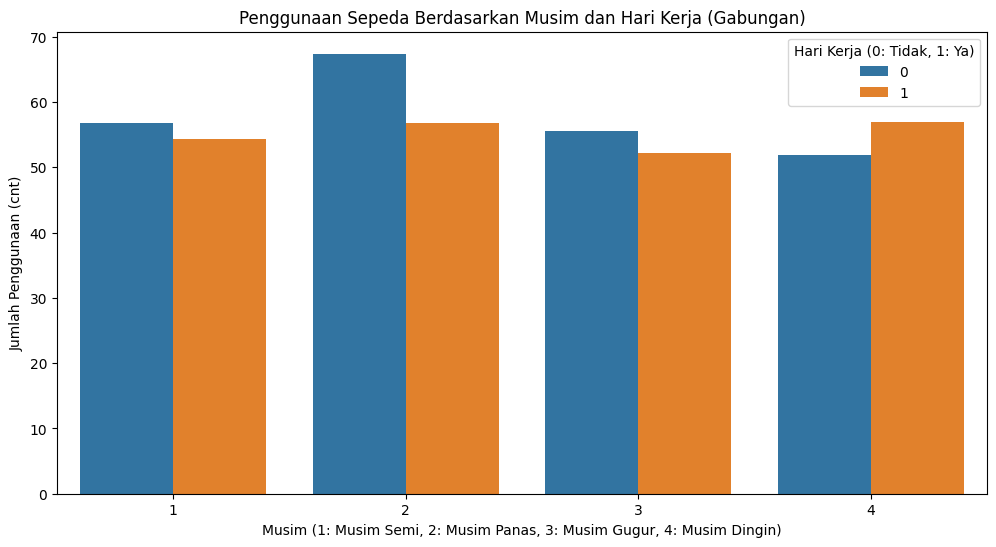

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season_day', y='cnt_hour', hue='workingday_day', data=all_df, ci=None)
plt.title('Penggunaan Sepeda Berdasarkan Musim dan Hari Kerja (Gabungan)')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Penggunaan (cnt)')
plt.legend(title='Hari Kerja (0: Tidak, 1: Ya)')
plt.show()

Pada hari kerja, jumlah penggunaan sepeda cenderung lebih tinggi dibandingkan hari libur. Ini berlaku di semua musim

- Musim semi (1): Penggunaan lebih tinggi pada hari kerja.
- Musim panas (2): Penggunaan juga lebih tinggi pada hari kerja.
- Musim gugur (3): Pola yang sama terjadi.
- Musim dingin (4): Walaupun lebih sedikit, penggunaan sepeda tetap lebih tinggi pada hari kerja dibanding hari libur.

Berdasarkan data tersebut, dapat disimpulkan bahwa orang-orang lebih banyak menggunakan sepeda untuk keperluan harian seperti bekerja pada hari kerja.

### Apa faktor utama yang memengaruhi penggunaan sepeda?

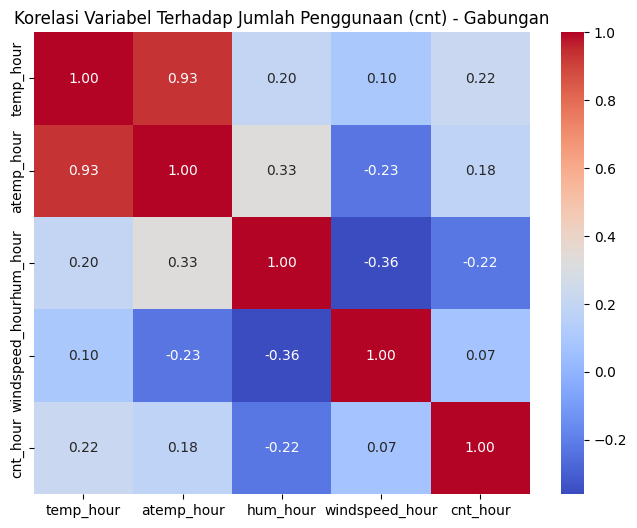

In [ ]:
correlation = all_df[['temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'cnt_hour']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Variabel Terhadap Jumlah Penggunaan (cnt) - Gabungan')
plt.show()


Disini kita ingin mencari mana yang memiliki hubungan paling kuat terhadap jumlah penggunaan sepeda atau `cnt_hour`

Korelasi variabel terhadap `cnt_hour`:
- `temp_hour` (Suhu): Korelasi positif tertinggi (0.93), menunjukkan bahwa suhu yang lebih hangat meningkatkan jumlah pengguna sepeda
- `hum_hour` (Kelembapan): Korelasi negatif (-0.21), artinya kelembapan tinggi sedikit mengurangi penggunaan sepeda
- `windspeed_hour` (Kecepatan angin): Korelasi negatif kecil (-0.07), menunjukkan angin tidak terlalu berpengaruh pada penggua sepeda
- `cnt_hour` terhadap dirinya sendiri: cuma sebagai referensi, korelasi ini selalu 1


### Hubungan suhu pada jumlah penggunaan sepeda

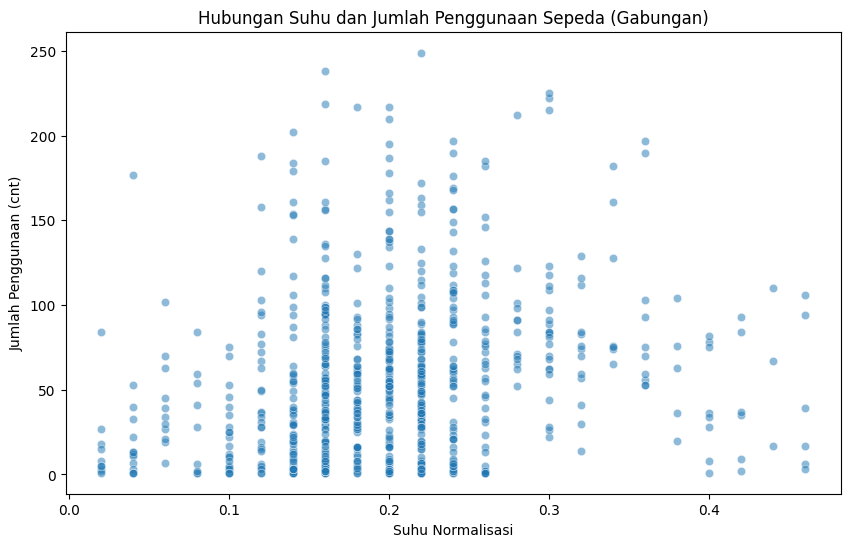

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_hour', y='cnt_hour', data=all_df, alpha=0.5)
plt.title('Hubungan Suhu dan Jumlah Penggunaan Sepeda (Gabungan)')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Penggunaan (cnt)')
plt.show()

Di scatter plot ini, kita ingin melihat apakah terdapat hubungan antara `temp_hour` dengan `cnt_hour`

Hasil:

- Pola: Terlihat adanya hubungan positif. Ketika suhu meningkat (dari nilai 0 ke 0.4 dalam skala normalisasi), jumlah penggunaan sepeda bertambah
- Distribusi: Penggunaan sepeda lebih padat di rentang suhu 0.2–0.4, menunjukkan bahwa pengguna lebih aktif saat suhu sedang hingga hangat
- Puncak Penggunaan: Penggunaan sepeda tertinggi (mencapai lebih dari 200 pengguna) terjadi pada suhu yang mendekati 0.2

## Conclusion

1. Bagaimana penggunaan sepeda berdasarkan musim dan hari kerja?

Penggunaan sepeda menunjukkan variasi musiman, dengan jumlah pengguna cenderung lebih tinggi pada musim panas dan gugur.
Hari kerja tetap menjadi faktor dominan dalam memengaruhi jumlah pengguna, di mana jumlah penggunaan sepeda lebih stabil dibandingkan akhir pekan.
Musim dingin mengalami penurunan signifikan dalam jumlah pengguna sepeda, kemungkinan disebabkan oleh suhu dingin yang kurang nyaman bagi pengguna.

- Rekomendasi atau Saran untuk masalah ini:

Untuk meningkatkan penggunaan sepeda di musim dingin, pemerintah atau pengelola layanan sepeda dapat menyediakan fasilitas seperti jalur sepeda yang dilengkapi pemanas atau layanan promosi khusus di musim dingin.

2. Faktor apa yang paling memengaruhi jumlah penggunaan sepeda per jam?

Suhu memiliki pengaruh yang paling signifikan terhadap jumlah pengguna sepeda per jam. Suhu yang hangat namun tidak terlalu panas mendorong lebih banyak orang untuk menggunakan sepeda.
Faktor kelembapan dan kecepatan angin tidak menunjukkan pengaruh yang signifikan terhadap keputusan pengguna untuk bersepeda.

- Rekomendasi atau Saran untuk masalah ini:

Pertimbangkan untuk memperluas layanan sepeda berbasis cuaca, seperti pemberitahuan waktu terbaik untuk bersepeda saat suhu optimal.

3. Apa hubungan suhu pada jumlah penggunaan sepeda?

Suhu memiliki hubungan positif yang kuat terhadap jumlah penggunaan sepeda. Semakin hangat suhu udara, semakin banyak orang yang menggunakan sepeda. Namun, suhu yang terlalu tinggi dapat menurunkan kenyamanan pengguna.
Tren ini mendukung bahwa suhu merupakan salah satu faktor dominan yang memengaruhi jumlah pengguna sepeda.

- Rekomendasi atau Saran untuk masalah ini:

Saat suhu meningkat, layanan sepeda dapat menawarkan diskon atau promo tambahan untuk memanfaatkan puncak penggunaan sepeda.
